In [7]:
from PIL import Image
import numpy as np

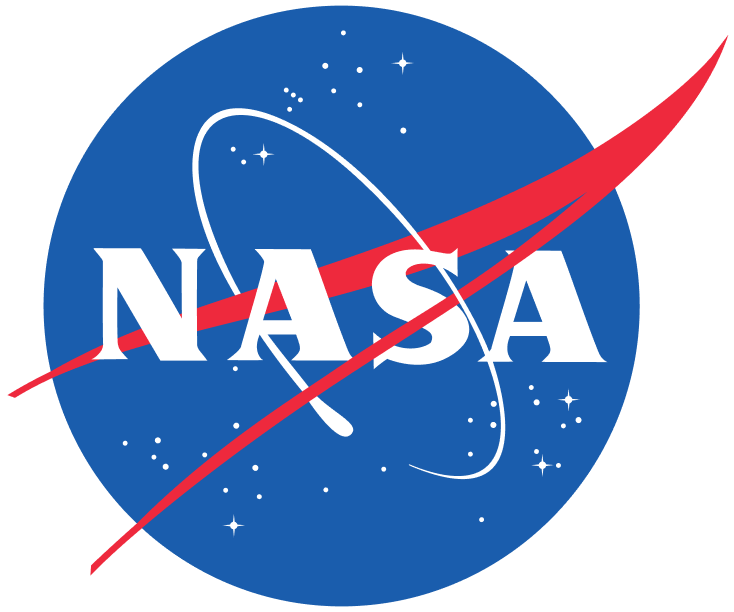

In [56]:
img = Image.open('test2.png')
display(img)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

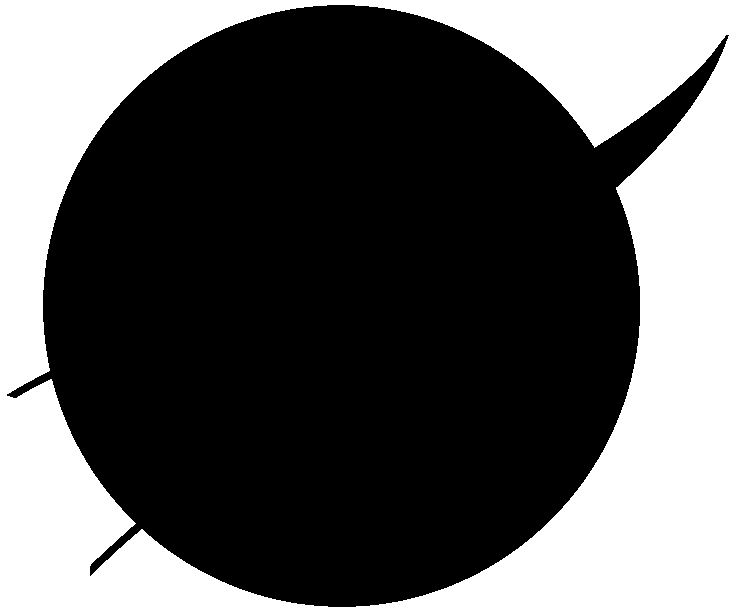

In [57]:
mask = np.asarray(img.convert('L'))
mask = mask < 1
display(mask)
mask_img = Image.fromarray(mask)
display(mask_img)

In [58]:
import math

def distance(a1, a2, b1, b2):
    return math.sqrt((a1 - b1)**2 + (a2 - b2)**2)

In [62]:
def find_two_nearest(y, x, l): # y coord, x coord, list of points
    Fn, Sn = 1_000_000_000, 1_000_000_000
    for point in l:
        d = distance(y, x, point[0], point[1])
        if d < Fn:
            Fn, Sn = d, Fn
        elif d < Sn:
            Sn = d
    return Fn, Sn

In [63]:
from random import randrange

N = 15
size = mask.shape
print(size)

points = []

while len(points) < N:
    point = (randrange(0, size[0]), randrange(0, size[1]))
    if not mask[point[0]][point[1]]:
        points.append(point)

print(points)

(612, 734)
[(243, 221), (206, 421), (392, 455), (111, 259), (214, 545), (51, 387), (279, 267), (321, 255), (122, 420), (450, 340), (513, 131), (585, 312), (43, 299), (258, 311), (558, 414)]


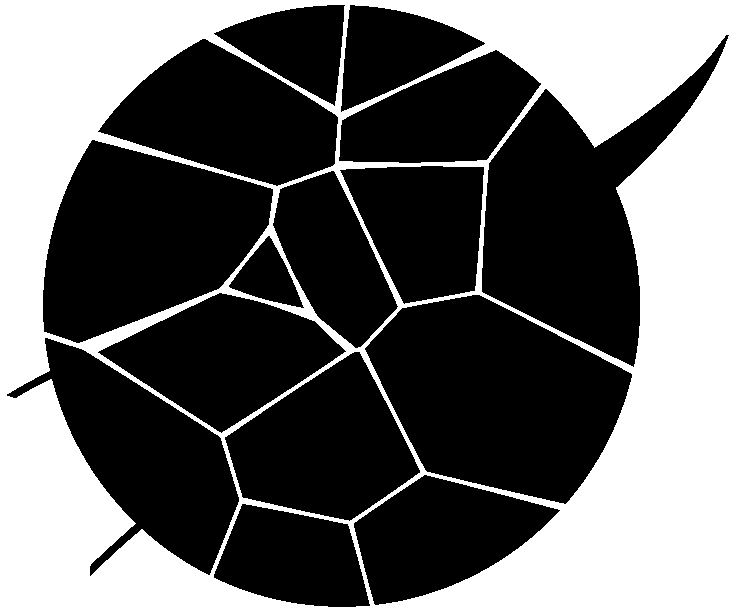

In [64]:
new_img = mask.copy()

for y, row in enumerate(mask):
    for x, val in enumerate(row):
        if not mask[y][x]:
            Fn, Sn = find_two_nearest(y, x, points)
            if (Sn - Fn) < 4:
                new_img[y][x] = True

new_img = Image.fromarray(new_img)
display(new_img)